<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/MatematicasParaIA/5_Optimizacion/optimizacion.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")

# Introducción a la Optimización

En la clase de hoy veremos un concepto central en Aprendizaje Automático, la optimización. Es la primera instancia en donde veremos los métodos que nos llevan a decir que un algoritmo está *aprendiendo*. También será nuestro primer acercamiento a las técnicas que se usan en el día a día trabajando en este hermoso rubro para lograr dicho objetivo. Definiremos también matemáticamente el proceso de optimización, alguna que otra sutileza, y terminaremos analizando y evaluando los métodos iterativos más usados para llevar a cabo la optimización.

La clase intentará responder a dos grandes interrogantes. 

- ¿Qué es optimizar?
- ¿Cómo encontrar el óptimo matemática y computacionalmente?

Para ello debemos introducir los conceptos centrales **Optimizacion, Métodos iterativos (gradiente descendiente) y Convexidad**



### Optimización

Qué es optimizar? En el día a día nos encontramos con infinidad de ejemplos. Más aún, me animo a deicr que cualquier persona puede definir este concepto sin problema alguno, incluso si no cuenta con herramientas matemáticas a mano para hacerse el canchero.

Optimizamos en el día a día cuando 
 - decidimos que bondi tomar que nos lleve lo más rápido posible desde un punto A a un punto B
 - elegimos el precio más barato de un dulce de leche, total todos son ricos 
 - decidimos anotarnos en un curso de humai que se adecúe lo más posible a nuestras necesidades e intereses 
 - tomamos la decisión de estar una cierta cantidad de tiempo estudiando un concepto 
 
Si analizamos los ejemplos descriptos observamos partes comunes en las tareas que involucra cada uno de ellos. En todos los ejemplos

<center><img src="https://upload.wikimedia.org/wikipedia/commons/9/9a/Buenos_Aires_-_Colectivo_132_-_120227_131759.jpg" width="400" 
     height="500"></center>

1. tenemos que **tomar una decisión** que vive en un **Espacio de Decisión**
     - elegir el bondi
     - elegir el dulce de leche
     - elegir un curso
     - elegir tiempo de permanencia en un concepto
2. también definimos en qué nos basamos para **justificar/guiar** nuestra elección de ese óptimo, tenemos una **Función de Costo/Recompensa** en genearl **Función Objetivo**
     - minimizamos el tiempo de viaje
     - minimizamos el costo del dulce de leche
     - maximizamos el provecho que le sacaremos a un curso
     - maximizamos el entendimiento de un concepto o minimizamos nuestra ignorancia
3. por último usamos algún **método** para que la elección de la opción final sea la óptima según la métrica elegida
     - le pedimos a google maps que nos diga, o si somos old school agarramos una guia-T
     - recorremos con la vista los precios de la góndola
     - leemos la descripción de los cursos
     - nos conocemos y sabemos qué pasa a medida que vamos acumulando horas en un tema






# Espacio de Decisión

Como vimos, siempre el objetivo de una optimización es encontrar un valor, tomar una decisión. Formalmente podemos definir a esta solución como un valor dentro de nuestro espacio de decisión. 

- un conjunto de bondis posibles a tomar
- un número finito de dulce de leches de los cuales elegir
- un set de cursos de los cuales elegir
- tiempo 


Si nuestro valor óptimo es $\color{orange}{x^*}$ decimos que 

$$
\color{orange}{x^* \in \mathbf{X} \quad \mathbf{X} \subseteq \mathbb{R^n}}
$$

donde $\color{orange}{\mathbf{X}}$ es nuestro espacio de decisión. Este, puede estar contenido o ser igual a un espacio como ser $\color{orange}{\mathbf{R^n}}$. Notese que $\color{orange}{\mathbf{R^n}}$ es un ejemplo, puede ser cualquier otro conjunto de posibles decisiones. 


En todos los ejemplos menos el último que vimos, todos los espacio de decisión son conjuntos discretos y finitos. 

- las lineas de bondi 
- las marcas de DDL 
- los cursos


Esta definición vale también para conjuntos que son continuos, como por ejemplo todos los valores de numeros reales en 1 dimensión, la recta real.

<center><img src="https://www.gmatsyllabus.com/images/stories/quant/real_num.png" ></center>

El cuarto de los ejemplos será nuestro caballito de batalla para ejemplificar el proceso de optimziación. En este caso el valor a optimizar vive dentro de un espacio continuo, el tiempo. Ignoremos por ahora los tiempos negativos.


# Función Objetivo, Costo/Recompensa

Las funciones que queremos optimizar pueden ser definidas de manera sencilla o necesitar de un proceso de modelado. Es decir, a la hora de definir qué usaremos como métrica para evaluar cuan bien o cuan mal estamos. Definir bien una función de costo es importantísimo a la hora de optimizar, porque a fin de cuentas, estamos optimizando contra un modelo de lo que consideramos costo o recompensa. Depende qué elijamos, el valor óptimo será distinto, ya que un valor óptimo para una función puede ser subóptimo para otra.

Definamos por ejemplo la función de recompensa *educativa* (ponele) por las horas estudiadas. Plantearé un modelo que suena razonable, dejando a esta recompensa como

$$
\color{orange}{f(x)=-(x-3)^2 + 8}
$$

son arbitrarios los números usados, fueron elegidos solamente para poder obtener una función recompensa positiva con valores de tiempo positivo

In [2]:
x_r = np.linspace(start=-4,stop=10,num=100)

def reward(x):
    return -(x-3)**2 + 8

y_r = reward(x_r)

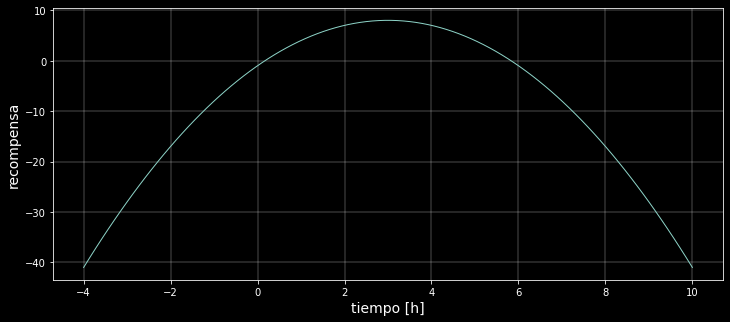

In [3]:
fig = plt.figure(figsize=(12,5))
_ = plt.plot(x_r,y_r,linewidth=1)
_ = plt.grid(linewidth=0.3)
_ = plt.xlabel("tiempo [h]", fontsize=14)
_ = plt.ylabel("recompensa", fontsize=14)

Esta función a mi me representa bastante, no es infalible pero es una excelente aproximación. Ignoremos tiempos negativos, porque no tienen sentido ahora.

- a medida que el tiempo de estudio incrementa aumenta la recompensa
- el valor del tiempo de estudio vale más en las primeras horas
- hay un punto justo de máxima verdad, máxima sabiduría 
- si agregamos más horas solamente me termino quemando y es contraproducente.

Nosotros queremos maximizar la recompensa, y haciendo eso tendremos un valor de tiempo que deberíamos estudiar si este modelo realmente funcionase. Entonces

$$
\color{orange}{x_{\text{óptimo}} = x^{*}}
$$

donde 

$$
\color{orange}{x^{*} = \underset{x}{\arg\max} \ f(x)}
$$

esto se lee de la siguiente forma: $\color{orange}{{x ^*}}$ es el valor de $\color{orange}{x}$ que maximiza el valor de $\color{orange}{f(x)}$. Aquí $\color{orange}{\arg}$ lo que señala es que estamos buscando el valor de timepo que maximiza la recompensa.

Si nos interesara encontrar el valor máximo de recompensa $r$ deberíamos escribirlo de la siguiente forma

$$
\color{orange}{r = \max \ f(x)}
$$

generalmente los valores propios de ese maximo no nos importan mucho, es el argumento que maximiza la función de costo lo que buscamos. 

# Hallando el óptimo

Para continuar con el ejemplo hallaremos el óptimo de esta función con un método determinista para luego dar pie a los métodos iterativos. 

Como han visto en la clase de derivadas, la derivada es en esencia la manera más hermosa que existe de represntar la variación local de una función. En los máximos o mínimos las variaciones son nulas. Esto es fácil de ejemplificar imaginandonos parados en el punto más alto de un monticulo de arena y me muevo una distancia infinitesimalmente chica, la altura del suelo a la que estoy, no varía. 

<br>

<center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTjv3rEPpJeMu4at-UZz6hC6U94tSEac6k_8g&usqp=CAU" height=300 width=300></center>

Entonces esto indica que si derivamos e igualamos a cero podríamos encontrar el valor de x que maximiza la recompensa. Calculamos la derivada de la función modelo que usamos

$$
\color{orange}{f'(x) = -2(x-3)}
$$

$$
\color{orange}{-2(x-3)=0 \ \implies \ x=3}
$$


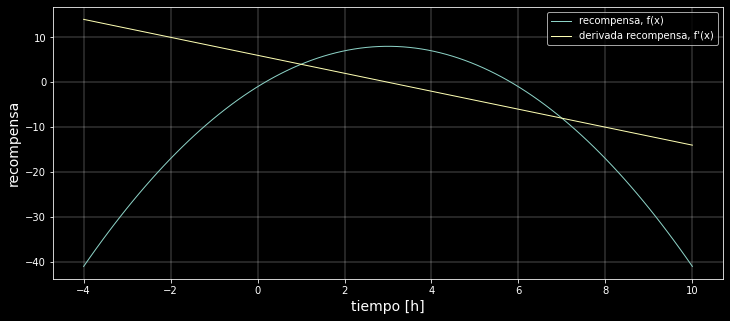

In [4]:
deriv_reward = lambda x: -2*(x-3)

y_deriv = deriv_reward(x_r)

fig = plt.figure(figsize=(12,5))
_ = plt.plot(x_r,y_r,linewidth=1, label="recompensa, f(x)")
_ = plt.plot(x_r,y_deriv, linewidth=1, label="derivada recompensa, f'(x)")
_ = plt.xlabel("tiempo [h]", fontsize=14)
_ = plt.ylabel("recompensa", fontsize=14)
_ = plt.grid(linewidth=0.3)
_ = plt.legend(loc=1)

# Puntos críticos

Que fácil, no? La vida no es tan linda igual. Que la derivada sea nula no es condición suficiente para encontrar un punto máximo o mínimo. Veamos otra función y observemos por qué queda corto este approach, o no resulta tan directo. 

Para funciones de **una variable** un punto $\color{orange}{x_0}$ es **crítico** para $\color{orange}{f}$ si 

$$
\color{orange}{f^{'}(x_0) = 0 }
$$

para una función multivariable un punto $\color{orange}{\mathbf{x_0}}$ es **crítico** para $\color{orange}{g}$ si

$$
\color{orange}{\left.{\nabla g } \right|_{\mathbf{x_0}} = \mathbf{\vec{0}}} 
$$

## Máximos y Mínimos


Vamos a graficar un polinomio, sin ningún significado, no hay ninguna intención detras de esta elección. No estamos queriendo representar funciones de costo, será solamente un ejemplo para categorizar puntos críticos. 

In [5]:
polynomial = np.poly1d([2,-4,-28,62,122,-256,-196,140,392,240,72])# Creamos un plinomio unidimensional
polynomial_root = polynomial.deriv().r # Calculamos la derivada del mismo 
r_crit = polynomial_root[polynomial_root.imag==0].real # Encontramos las raíces de la derivada (las raíces reales, porque las imaginarias no nos interesa graficarlas)
test = polynomial.deriv(2)(r_crit) # calcularmos la derivada segunda del polinomio para hallar si es un máximo o un mínimo

Vamos a definir una función en donde exista más de un solo punto con la derivada nula. De esta manera ejemplificaremos cuando es más laborioso encontrar óptimos. La clase `poly1d`  de `numpy` nos va a ayudar en esto. Ignoremos todo lo que incluya temas vinculados a números complejos, pero para aquellos que estén interesados pueden recurrir a la <a href="https://es.wikipedia.org/wiki/N%C3%BAmero_imaginario" >wiki</a>.

- Definimos el polinomio a partir de un array de pesos
- Luego de definirlo calculamos la derivada del mismo.
- Hallamos los puntos críticos (derivada nula) 
- Creamos un array con los valores de la derivada segunda del polinomio sobre los puntos críticos para saber si se tratan de un máximo o un mínimo.

Grafiquemos el polinomio y anotemos los puntos críticos.

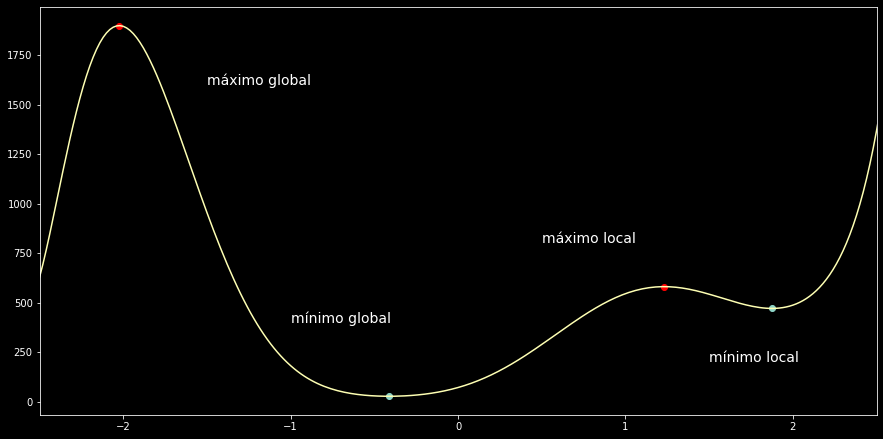

In [6]:
fig = plt.figure(figsize=(15,7.5))

x_max = r_crit[test<0]
y_max = polynomial(x_max)

x_min = r_crit[test>0]
y_min = polynomial(x_min)

#máximos
_ = plt.plot(x_max, y_max, 'o', color='r')
_ = plt.text(-1.5, 1600, 'máximo global', fontsize=14)
_ = plt.text(0.5, 800, 'máximo local', fontsize=14)


# mínimos 
_ = plt.text(-1, 400, 'mínimo global', fontsize=14)
_ = plt.plot(x_min, y_min, 'o')
_ = plt.text(1.5, 200, 'mínimo local', fontsize=14)

xc = np.arange(-2.5, 2.6, 0.02)
yc = polynomial(xc)
_ = plt.plot( xc, yc)
_ = plt.xlim([-2.5,2.5])

Los valores máximos y mínimos caen como vemos dentro de dos categorías. 

- **locales**: son el valor máximo o mínimo en un subconjunto del dominio de la función.
- **globales**: son el valor máximo o mínimo en el dominio de la función.

Es decir que en este caso para encontrar el valor máximo o mínimo de una función deberíamos calcular todos los puntos críticos $x_i$ evaluar $f$ para cada uno de ellos y seleccionar el máximo o mínimo de ellos según corresponda.

Esta definición es válida para tanto funciones univariables como multivariables. En la figura debajo se pueden observar estos extremos para un campo escalar de dos variables. 

<center>
<img src="https://blog.paperspace.com/content/images/2018/05/challenges-1.png">
</center>

## Puntos de inflexión 

Hay otra clase de puntos críticos que se denominan puntos de inflexión. Son puntos en los cuales la derivada es cero pero no se corresponde con un máximo o con un mínimo. Para funciones de una variable esto es relativamente sencillo de osbservar en casos como por ejemplo 

$$
\color{orange}{f(x)=x^3}
$$

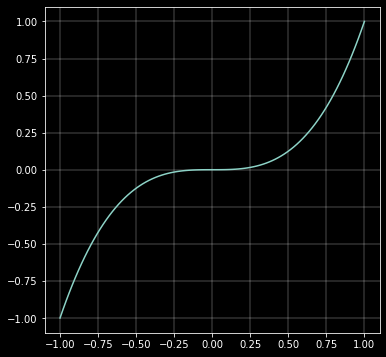

In [7]:
x_infl = np.linspace(-1,1,100)
y_infl = x_infl**3

fig = plt.figure(figsize=(6,6))
_ = plt.plot(x_infl,y_infl)
_ = plt.grid(linewidth=0.3)

Para funciones de más de una variable este punto se lo suele llamar punto de ensilladura, traducción de *saddle point*. El gráfico debajo explica el por qué de la elección de este nombre. Este gráfico corresponde a 

$$
\color{orange}{f(x,y) = x^2 - y^2 }
$$

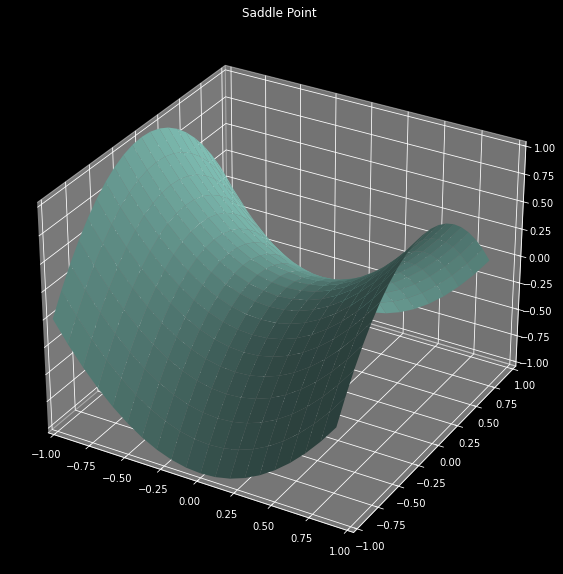

In [8]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x_inf2, y_inf2 = np.mgrid[-1:1:0.1, -1:1:0.1]
z = x_inf2**2 - y_inf2**2

ax.view_init(azim=-60, elev=30)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.plot_surface(x_inf2, y_inf2, z)

plt.title("Saddle Point")
plt.show()

# Equivalencia entre hallar el máximo o mínimo 

Cualquier problema de máximización puede ser transformado a uno de minimización y viceversa. Esto es tan sencillo como multiplicar por menos uno la **función objetivo** con la que estamos trabajando. Es decir que 

$$
\color{orange}{\underset{x}{\arg\max} \ f(x) = \underset{x}{\arg\min} \ {-f(x)}}  
$$
 
de la misma forma que 

$$
\color{orange}{\max f(x) = -\min(-f(x))}
$$

Es necesario también entender que lo que estamos viendo ahora es la **función de costo** para nuestro ejemplo la llamaré ignorancia, ya que es lo que queremos minimizar cuando estamos estudiando. 

La **función de costo** también se puede encontrar como **función de pérdida**, o **Loss Function**.

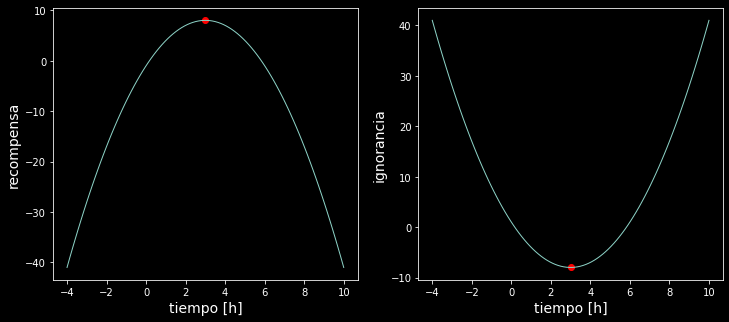

In [9]:
fig,ax = plt.subplots(ncols=2, figsize=(12,5))

# reward(t)
_ = ax[0].plot(x_r,y_r,linewidth=1)
_ = ax[0].set_xlabel("tiempo [h]", fontsize=14)
_ = ax[0].set_ylabel("recompensa", fontsize=14)
_ = ax[0].scatter(3, reward(3),c='r')

# -reward(t)
_ = ax[1].plot(x_r,-y_r,linewidth=1)
_ = ax[1].set_xlabel("tiempo [h]", fontsize=14)
_ = ax[1].set_ylabel("ignorancia", fontsize=14)
_ = ax[1].scatter(3, -reward(3),c='r')

En aprendizaje automático se suele usar minimización de una función de costo en vez de maximizar la recompensa, por más que sean equivalentes. Esto puede estar justificado por la amplia presencia de optimización convexa (ya llegaremos ahí en un rato) en la literatura de análisis numérico. Estos son los resultados de google scholar!

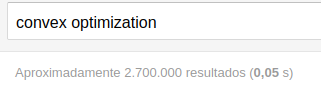
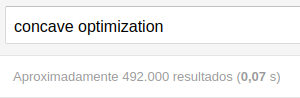



# Optimización restringida

Ningún problema de optimización termina de estar definido si no se definen restricciones sobre el dominio. Esto es también natural, uno restringe el espacio de diseño para no estar inspeccionando soluciones que no queremos o no son reales para nuestro problema. Por ejemplo, con nuestro hermoso modelo de recompensa o ignorancia podríamos decir que 

- horas negativas no cuentan, ya que no tienen mucho sentido
- horas mayores a 6 tampoco porque nuestro span de atención tiene límites

Las restricciones sobre la optimización son sobre el espacio de diseño, el dominio de nuestra función. Hay dos tipos de restricciones.

- restricciones de desigualdad
- restricciones de igualdad


### Restricciones de Desigualdad 

Las restricciones de desigualdad son las que mencionamos recién como ejemplo. Se llaman así porque las representamos como una desigualdad matemática. En el caso de las que propusimos esto consistiría en decir que 

$$
\color{orange}{g_1(x) \leq 0 \ \text{ donde } \ g_1(x) = x-5}
$$


$$
\color{orange}{g_2(x) \leq 0 \ \text{ donde } \ g_2(x) = -x}
$$

esto lo escribimos así porque se suelen resumir en notación todas las restricciones de desigualdad de la siguiente forma 

$$
\color{orange}{g_{i}(x)\leq 0,\quad i=1,\dots ,m}
$$

donde $\color{orange}{m=2}$ en nuestro ejemplo.


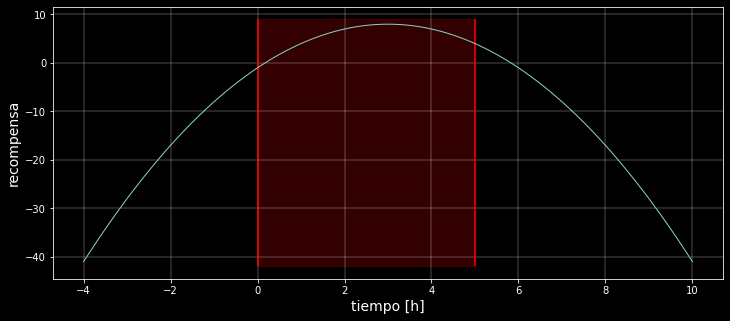

In [10]:
fig = plt.figure(figsize=(12,5))
_ = plt.plot(x_r,y_r,linewidth=1)
_ = plt.grid(linewidth=0.3)
_ = plt.xlabel("tiempo [h]", fontsize=14)
_ = plt.ylabel("recompensa", fontsize=14)

#restricciones de desigualdad

#g1
_ = plt.vlines(0,ymin=min(y_r)-1, ymax= max(y_r)+1, color='r')

#g2
_ = plt.vlines(5,ymin=min(y_r)-1, ymax= max(y_r)+1, color='r')

#fill
_ = plt.fill_between([0,5], max(y_r)+1, min(y_r)-1, color='red', alpha=.2)



### Restricciones de Igualdad 

Estas restricciones como ya se podrán imaginar se expresan como igualdades. Podríamos decir que solamente podemos estudiar una serie de posibles horarios, digamos 2 3 o 4 horas. De modo que para encontrar el máximo solamente deberíamos evaluar las funciones en estos valores de tiempo. Las restriccinoesse escribirían de la siguiente manera

$$
\color{orange}{h_1(x) = 0 \ \text{ donde } \ h_1(x) = x-2 }
$$
$$
\color{orange}{h_2(x) = 0 \ \text{ donde } \ h_2(x) = x-3 }
$$
$$
\color{orange}{h_3(x) = 0 \ \text{ donde } \ h_3(x) = x-4 }
$$

de forma más compacta 

$$
\color{orange}{h_{j}(x) = 0,\quad i=1,\dots ,p}
$$

donde $\color{orange}{p=3}$ en nuestro ejemplo.


Para funciones de más de una variable las restricciones de igualdad necesitan de métodos más complejos para resolverlos analíticamente. Lo bueno es que no nos interesa, pero sepan que existen. Como ejemplo aquí debajo está la optimización restringida a una elipse de un campo escalar correspondiente a un paraboloide i.e. 

$$\color{orange}{z=x^2+y^2}$$


![image.png](./imgs/restriccion_igualdad.png)

<a href="https://demonstrations.wolfram.com/ConstrainedOptimization/" > mas info</a>


Entonces ahora podemos escribir la formulación de un problema de optimización completo

$$\begin{aligned}&{\underset {x}{\operatorname {arg min} }}&&f(x)\\&\operatorname {sujeto\;a} &&g_{i}(x)\leq 0,\quad i=1,\dots ,m\\&&&h_{j}(x)=0,\quad j=1,\dots ,p\end{aligned}$$

# Metodos iterativos, por qué los necesitamos?

Los métodos iterativos viven son *creados* y estudiados dentro del mundo del **análisis numérico**. Para empezar a hablar de esto debemos hacer la distinción que ya mencionamos a la pasada.

Nuestro universo se divide en dos ahora, **analítico** y **numérico**. 

### Soluciones Analíticas

La parte del universo de soluciones **analíticas** es un universo hermoso donde las soluciones a una ecuación se pueden escribir de forma **cerrada**. La solución en forma cerrada significa que podemos escribirla con operaciones matemáticas y funciones pertenecientes a un conjunto *aceptado* de las mismas. A pesar de tratarse de matemática, ciencia exacta, esta definición es por naturaleza un poco laxa. Este conjunto aceptado no es igual para todas las disciplinas. A nosotros nos va a importar saber que con nos referimos a las funciones típicas, exponenciales, potencias, funciones trigonométricas, entre otras. Una serie infinita no la consideraremos dentro de nuestro set. 

Miremos la siguiente ecuación 

$$\color{orange}{x^2 - 2 = 0}$$ 

podemos despejar $\color{orange}{x}$ sencillamente 

$$
\color{orange}{x = \pm \sqrt{2}}
$$

es decir que tenemos todos los recursos a mano para definir la solución usando una función aceptadisima como ser la raíz cuadrada. Miremos esta otra

$$
\color{orange}{x^6-4x^5+\sin (x)-e^x+7-\frac{1}{x} =0}
$$

esta ecuación no tiene solución en forma cerrada, es decir no podemos usar funciones *convencionales* para despejar $x$. Si no me creen, intentenlo. Aquí es donde nos es muy útil el análisis numérico. Existen también situaciones en las cuales si bien podemos escribir algo en forma cerrada es muy lento calcularlo de esa manera con el hardware disponible, y las alternativas numéricas vienen muy a mano.



### Soluciones Numéricas

En la otra cara de esta moneda, la numérica, lo que hacemos siempre son aproximaciones a la solución. Es importante recordar aquí que las computadoras no saben lo que es un número real. Por más que felizmente escribamos `np.pi` para usar $\color{orange}{\pi}$, la representación en hardware, en memoria, es de un número racional que aproxima con una cantidad altísima de decimales a $\color{orange}{\pi}$, lo mismo vale para la raíz cuadrada calculada anteriormente. 

Los métodos numéricos son el mejor amigo de la compu, y el desarrollo teórico del Análisis Numérico ( en gran parte previo a la existencia de las mismas) da lugar a un métodos muy eficientes usados en un montón de operaciones usuales.
    
Pongamos un ejemplo caído a tierra. Digamos que tenemos que encontrar el punto donde una recta corta al eje x. Definimos a esta recta como 

$$
\color{orange}{f(x) = y = x - 5}
$$
    
Entonces necesitamos obtener la solución a
    
$$
\color{orange}{0 = x-5}
$$




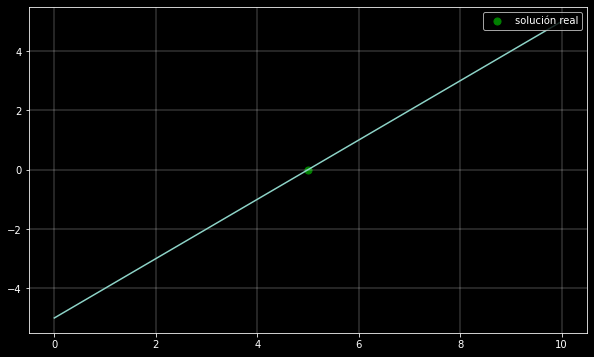

In [11]:
x_n = np.linspace(0,10,100)
y_n = x_n-5

_ = plt.figure(figsize=(10,6))
_ = plt.plot(x_n,y_n)
_ = plt.grid(linewidth=0.3)

_ = plt.scatter(5, 0, color='green', s=50, label="solución real")

_ = plt.legend(loc=1)


Por más sencillo que parezca que la solución es $5$, hagamos de cuenta que baja Dios del cielo y nos dice que no podemos sumar $5$ de ambos lados de la ecuación para despejar el resultado. Nos dice que tenemos que usar un método numérico si o si. Como somos muy creyentes le decimos ok.


Entonces, una manera sería la siguiente, agarramos un intervalo $\color{orange}{[a_0,b_0]}$ donde sabemos que $\color{orange}{f(a_0)<0}$ y $\color{orange}{f(b_0)>0}$ (esto se da porque la función que estamos viendo es creciente, caso contrario sería al revés) por ejemplo 

$$
\color{orange}{[a_0,b_0]=[3,8]}
$$

Los escribimos con subíndice porque vamos a ir cambiando estos valores en el proceso. Ahora calculemos para ambos puntos


$$
\color{orange}{f(a_0) = -2 \quad f(b_0)= 3 }
$$
    
Genial, elegimos bien. Ahora calculemos el punto medio de nuestro intervalo $\color{orange}{\frac{a_0+b_0}{2} = 5.5}$ y calculemos el valor de la función en ese punto


$$
\color{orange}{f(\frac{a_0+b_0}{2}) = f(5.5) = 0.5}
$$


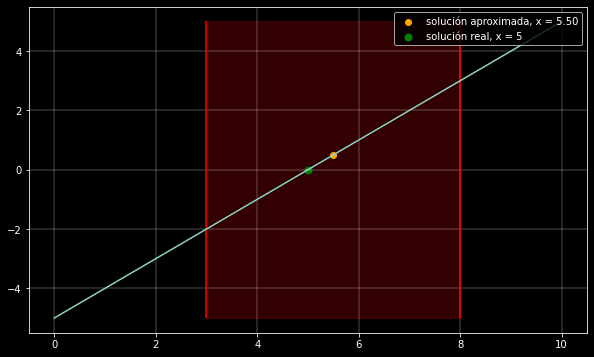

In [12]:
a = 3
b = 8

_ = plt.figure(figsize=(10,6))
_ = plt.plot(x_n,y_n)
_ = plt.grid(linewidth=0.3)

_ = plt.vlines(a, min(y_n), max(y_n), color='r')
_ = plt.vlines(b, min(y_n), max(y_n), color='r')
_ = plt.fill_between([a,b], min(y_n), max(y_n), color='r', alpha=0.2)

midpoint = (a+b)/2
_ = plt.scatter(midpoint, midpoint-5, color='orange', label=f"solución aproximada, x = {midpoint:.2f}")

_ = plt.scatter(5, 0, color='green', s=50, label=f"solución real, x = {5}")

_ = plt.legend(loc=1)


Cómo este valor es mayor a cero redefinamos, ahora $\color{orange}{b_1}$ será igual a $\color{orange}{5.5}$ dejando el intervalo como 

$$
\color{orange}{[a_1,b_1]=[3,5.5]}
$$

Volvamos a calcular el punto medio de este intervalo $\color{orange}{\frac{a_1+b_1}{2} = 4.25}$ y calculemos $\color{orange}{f}$


$$
\color{orange}{f(\frac{a_1+b_1}{2}) = f(4.25) = -0.75}
$$




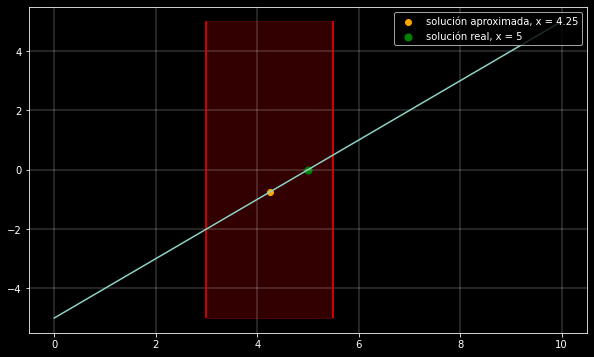

In [13]:
a = 3
b = 5.5

_ = plt.figure(figsize=(10,6))
_ = plt.plot(x_n,y_n)
_ = plt.grid(linewidth=0.3)

_ = plt.vlines(a, min(y_n), max(y_n), color='r')
_ = plt.vlines(b, min(y_n), max(y_n), color='r')
_ = plt.fill_between([a,b], min(y_n), max(y_n), color='r', alpha=0.2)

midpoint = (a+b)/2
_ = plt.scatter(midpoint, midpoint-5, color='orange', label=f"solución aproximada, x = {midpoint:.2f}")
_ = plt.scatter(5, 0, color='green', s=50, label=f"solución real, x = {5}")
_ = plt.legend(loc=1)


Repetimos el proceso pero ahora debemos cambiar $\color{orange}{a}$ y no $\color{orange}{b}$, dejando así 


$$
\color{orange}{[a_2,b_2]=[4.25,5.5]}
$$

Calculamos nuevamente el punto medio de nuestro intervalo


$$
\color{orange}{\frac{a_2+b_2}{2}=4.875}
$$ 


donde 


$$
\color{orange}{f(4.875) = -0.125}
$$



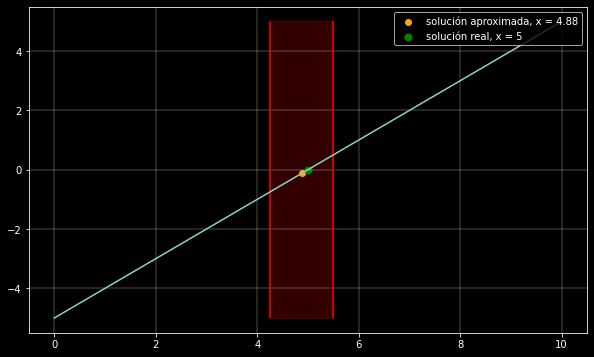

In [14]:
a = 4.25
b = 5.5

_ = plt.figure(figsize=(10,6))
_ = plt.plot(x_n,y_n)
_ = plt.grid(linewidth=0.3)

_ = plt.vlines(a, min(y_n), max(y_n), color='r')
_ = plt.vlines(b, min(y_n), max(y_n), color='r')
_ = plt.fill_between([a,b], min(y_n), max(y_n), color='r', alpha=0.2)

midpoint = (a+b)/2
_ = plt.scatter(midpoint, midpoint-5, color='orange', label=f"solución aproximada, x = {midpoint:.2f}")
_ = plt.scatter(5, 0, color='green', s=50, label=f"solución real, x = {5}")
_ = plt.legend(loc=1)

como el valor es negativo este será nuestro nuevo punto $\color{orange}{a_3=4.875}$ dejando al intervalo como 

$$\color{orange}{[a_3,b_3]=[4.875, 5.5]}$$

donde el punto medio es nuestra aproximación final del valor que queremos hallar

$$
\color{orange}{x \approx \frac{a_3+b_3}{2}= 5,1875}
$$
 
nada mal. 


## Metodo de la bisección

El método que *inventamos* se llama método de la bisección y es uno de los ejemplos más sencillos. Entonces el método iterativo quedaría definido con la siguiente serie de pasos. 

1. Elegir un intervalo $\color{orange}{[a_0,b_0]}$ donde los valores de $f$ en los extremos sean negativo y positivo.
2. Calcular punto medio. 
3. Evaluar $\color{orange}{f}$ en el punto medio $\color{orange}{\frac{a+b}{2}}$. 
    - si es positivo redefinir $\color{orange}{b_{i+1} = \frac{a_i+b_i}{2}} $ 
    - si es negativo redefinir $\color{orange}{a_{i+1} = \frac{a_i+b_i}{2}}$
4. Debemos parar? 
    - caso afirmativo devolver el último punto medio calculado
    - caso negativo repetir desde 1
    
    
En pseudocódigo se escribiría así.

<center>
<img src="http://www.frsn.utn.edu.ar/gie/an/enl/Metodobiseccion.gif">
</center>


Aquí la pregunta que se desprende es cuándo parar? En los métodos iterativos se suelen tomar dos criterios en casi todos los problemas. 

- **Número de iteraciones** o Máximas iteraciones: Como el proceso es iterativo podemos predefinir cuándo queremos parar. El lado positivo de este criterio es que ya sabemos de antemano cuanto tiempo va a correr nuestro algoritmo, ya que tiene un fin bien marcado. Por otro lado tiene como contra que no sabemos si el valor que reporte será satisfactorio. Los valores de los métodos numéricos muchas veces dependen de las condiciones iniciales, en nuestro ejemplo esto sería el intervalo inicial $[a_0, b_0]$. 
- **Tolerancia**. La tolerancia se refiere al error mínimo aceptado. Pero nos preguntamos, si no sabemos la solución real como podemos calcular el error. Acá hay una trampita en llamarle error. 

  Si el resultado que buscamos es $x$ y el valor para el paso i-ésimo de nuestro método iterativo es $x_i$ definimos a este error como 
  $$
  \color{orange}{e_i = |x_i - x_{i-1}|}
  $$
  
  entonces el criterio de la tolerancia nos pide definir una tolerancia $TOL$ tal que si 
  
  $$
  \color{orange}{e_i\leq TOL}
  $$
  
  paramos el algoritmo. Esto es bueno ya que podremos seleccionar la precisión con la que queremos el resultado. Asimismo no hay garantía sobre el tiempo de ejecución ya que podría ser una solución que conerga muy lento y estemos esperando años frente al monitor. 
  
Por los motivos expuestos se suelen usar los dos métodos en simultáneo. 

# Gradiente Descendiente

La mayoría de los algoritmos de Aprendizaje Automático involucra alguna optimización. Como venimos diciendo la mayoría de los problemas se enmarcan en minimizar una función. Esta función a minimizar la llamamos función de costo, de pérdida o error. 

$$\color{orange}{x^* = \underset{x}{arg \ min} \  f(x)}$$

En los problemas de ML en particular muchas veces no existe manera de resolver un problema de manera analítica de modo que necesitaremos utilizar algún método iterativo. El entrenamiento de una red neuronal es materializado por un proceso de optimización de una función de costo, o pérdida, i.e. minimización. 

Cuál es esa función de costo y qué impacto tiene su elección en el resultado del entrenamiento, escapa el alcance de esta clase. No obstante es importantísimo destacar que el **aprendizaje** queda condensado en la optimización!

Volvamos al ejemplo de nuestra función **ignorancia** sobre un tema de estudio en función del tiempo. Digamos que tenemos que minimizarla, sin restricciones algunas, ni de desigualdad ni igualdad. También digamos que baja nuevamente Dios del cielo y nos dice que no podemos usar métodos analíticos si es que existen. Cómo hacemos?

Recordemos que la derivada (en funciones univariables) nos da información sobre la pendiente de la gráfica. Es decir que cuando la función decrezca la pendiente será negativa, caso contrario será positiva. En los extremos ya vimos que será cero. Entonoces la derivada nos especifica como se escalea un cambio pequeño en el input ($x$, valor dentro del espacio de diseño). Como todo buen método iterativo tenemos que elegir un valor inicial. 

- Si $\color{orange}{f^{'}(x_0) > 0}$  avanzar en dirección creciente del eje x nos lleva a valores más altos. Queremos ir entonces en la dirección decreciente.
- Si $\color{orange}{f^{'}(x_0) < 0}$ avanzar en dirección creciente del eje x nos lleva a valores más bajos. Queremos ir entonces en la dirección creciente.


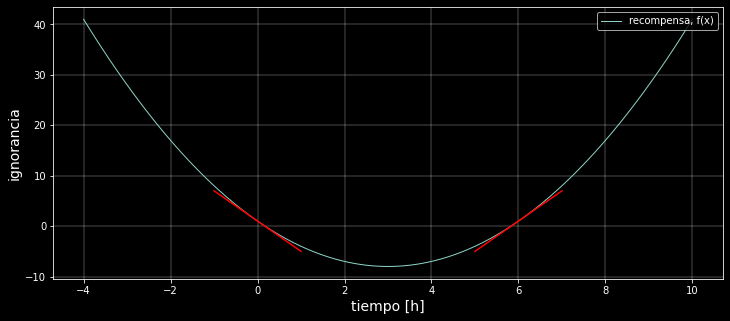

In [15]:
fig = plt.figure(figsize=(12,5))
_ = plt.plot(x_r,-y_r,linewidth=1, label="recompensa, f(x)")
_ = plt.xlabel("tiempo [h]", fontsize=14)
_ = plt.ylabel("ignorancia", fontsize=14)
_ = plt.grid(linewidth=0.3)
_ = plt.legend(loc=1)


x_test = np.array([0,6])
slopes = -deriv_reward(x_test)
rewards = -reward(x_test)


xx = np.linspace(-1,1,50)
for x_t,s,r in zip(x_test, slopes, rewards):
    _ = plt.plot(x_t+xx, s*xx+r, c='r',)


Entonces siempre queremos ir en dirección con el signo opuesto a la derivada. Es decir

- Si $\color{orange}{f^{'}(x_0) > 0 \implies  x_1<x_0}$
- Si $\color{orange}{f^{'}(x_0) < 0 \implies  x_1>x_0}$ 

donde $x_1$ es el segundo valor de $x$ que hayamos con nuestro método iterativo. Tenemos que elegir ahora cuanto avanzamos en $x$. Una posibilidad sería avanzar una distancia fija, como por ejemplo $1$. Esto tiene un problema. Si avanzamos una distancia fija vamos a estar haciendo saltos de distancia $1$, es decir limitamos nuestro espacio de búsqueda a 

$$\color{orange}{x_1 = x_0 + c \quad c\in\mathbb{N}}$$   

No nos sirve. Recordemos que nosotros tenemos información sobre cuanto cambia la función en un pequeño intervalo de $x$ con el valor de la derivada. Es decir, si la derivada es grande significa que tenemos enfrente una caída/subida pronunciada, tiene sentido avanzar un paso grande. Podemos escribir entonces el método iterativo de gradiente descnediente (se llama de gradiente porque se suele utilizar con funciones de más de una variable pero claramente es aplicable a funciones univariables como esta). 

$$\color{orange}{x_{i+1} = x_i - \epsilon f^{'}(x_i)}$$

donde 
- $\color{orange}{x_{i+1}}$ es el valor de $\color{orange}{x}$ en el próximo paso iterativo 
- $\color{orange}{x_i}$ el valor de $\color{orange}{x}$ en el paso actual $\color{orange}{i}$
- $\color{orange}{f^{'}(x_i)}$ el valor de la derivada en el paso iterativo actual $\color{orange}{i}$
- $\color{orange}{\epsilon}$ **learning rate** o ritmo de aprendizaje

In [16]:
# implementación de metodo iterativo de gradiente descendiente para la función ignorancia

deriv_ignorance = lambda x: -deriv_reward(x)

def descend_grad(x_0, grad, lr=1e-2, MAXITER=1e+3, TOL=1e-4):
    x_i = x_0
    for _ in range(int(MAXITER)):
        x_i_1 = x_i - grad(x_i)*lr
        
        if abs(x_i_1-x_i) < TOL:
            return x_i_1            
        x_i = x_i_1
 
    return x_i

x_0 = -15
x_minimum = descend_grad(x_0, deriv_ignorance, lr=1e-3, MAXITER=1e+2)
print(x_minimum)

-11.734202484391698


La pregunta de cómo elegir precisamente el learning rate o la cantidad máxima de iteraciones es una labor de optimización DIFERENTE a la de optimización propia de la función (o red) y es un mundo aparte, pero tengan en cuenta que existe y que los mismos principios generales reinan allí también. 

Es importante mencionar que:

- un valor muy pequeño de $\color{orange}{\epsilon}$ va a tardar mucho en aprender
- un valor muy grande de $\color{orange}{\epsilon}$ podría llegar a tener comportamientos divergentes, evitando el mínimo básicamente por pegar saltos muy grandes.


<center>
<img src="https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png">
</center>

<br>

como en todo existe un valor que es un punto justo. Si no me creen, miren el twitter del director de AI de Tesla Andrej Karpathy 

<br>


<center>
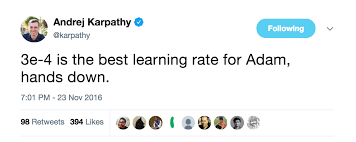
</center>

## Caso Multivariable

Miremos el caso de una función equivalente a la **ignorancia** pero en más dimensiones. Esta función es 

$$
\color{orange}{g(x,y) = x^2+y^2}
$$


<br>

<center>
<img src="https://raw.githubusercontent.com/adhiraiyan/DeepLearningWithTF2.0/master/notebooks/figures/fig0403a.jpeg">
</center>

<br>

En funciones de más de una variable como vimos, existe la posibilidad de calcular la derivada con respecto a una dirección arbitraria representada por el versor $\color{orange}{\mathbf{u}}$. Esta clase de derivadas se llaman derivadas direccionales. Hay un hermoso resultado del análisis que dice lo siguiente.

$$
\color{orange}{\frac{\partial g}{\partial \mathbf{u}} = \mathbf{u} \cdot \nabla g = \|u\|_2 \ \| \nabla g \|_2 \ cos \theta = \| \nabla g \|_2 \ cos \theta } 
$$

entonces la dirección que maximiza el valor de la derivada es aquella que maximiza el coseno del angulo entre el versor y el gradiente, es decir $\color{orange}{\theta = 0°}$. Entonces la dirección del gradiente es la dirección que maximiza el valor de la derivada direccional. Al contrario, la dirección de mayor decrecimiento es para $\color{orange}{\theta = 180°}$ o la dirección de 

$$
\color{orange}{-\nabla g}
$$

<center>
<img src="https://raw.githubusercontent.com/adhiraiyan/DeepLearningWithTF2.0/master/notebooks/figures/fig0403b.gif">
</center>

# Ejemplo: Cuadrados Mínimos

Recordamos que cuadrados mínimos trata el problema de ajustar una recta que minimize el valor del cuadrado total de los errores entre las variables observadas y las predicciones. El modelo que planteamos es 

$$\color{orange}{ \boldsymbol{\hat{y}} = \boldsymbol{\beta_0} + \boldsymbol{\beta_1 x}}$$


$$\color{orange}{ \boldsymbol{e} = \boldsymbol{y}-\boldsymbol{\hat{y}}}$$
$$\color{orange}{ e = \sum_{i=1}^{m}\boldsymbol{e}_{i}^2}$$

donde $\color{orange}{x}$ son las variables independientes, $\color{orange}{\boldsymbol{y}}$ las variables observadas,  $\color{orange}{\boldsymbol{\hat{y}}}$ las variables predecidas por el modelo

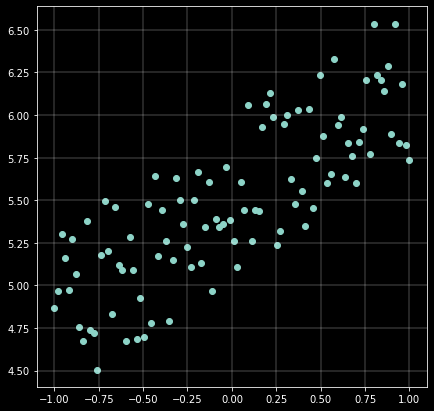

In [17]:
b0_true = 5
b1_true = 0.7
x_rl = np.linspace(-1,1,100)
y_rl = x_rl*b1_true + b0_true + np.random.random(x_rl.shape)

fig = plt.figure(figsize=(7,7))
_ = plt.scatter(x_rl,y_rl)
_ = plt.grid(linewidth=0.3)

Vimos que existe una fórmula cerrada para hallar los pesos que minimizan el error cuadrático medio. Vamos a reciclar esa solución para comparar con el método del gradiente descendiente. 


$$\color{orange}{\beta_1 = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^{n}(x_i-\bar{x})^2}}$$

$$\color{orange}{\beta_0 = \bar{y} - \beta_1\bar{x}}$$

In [18]:
b1_num = (x_rl - x_rl.mean()).dot(y_rl - y_rl.mean())
b1_den = (x_rl - x_rl.mean()).dot(x_rl - x_rl.mean())
b1 = b1_num/b1_den
b0 = y_rl.mean() - b1*x_rl.mean()
print(f"β₀= {b0:.3f}, β₁= {b1:.3f}")

β₀= 5.492, β₁= 0.631


Nosotros queremos minimizar nuestra función de costo, en este caso esa función será el promedio de los errores, también conocida como $\color{orange}{MSE}$

$$\color{orange}{e=\frac{1}{m}\sum_{i=1}^{m}\boldsymbol{e}_{i}^2}$$ 

Las variables que queremos optimizar son $\color{orange}{\beta_0}$ y $\color{orange}{\beta_1}$. Entonces $\color{orange}{e(\beta_0, \beta_1)}$. Debemos calcular el gradiente de esta función de costo. 

$$
\color{orange}{\nabla e = \left( \frac{\partial e}{\partial \beta_0} , \frac{\partial e}{\partial \beta_1} \right)}
$$

entonces 

$$
\color{orange}{\frac{\partial e}{\partial \beta_0}=  \frac{\partial}{\partial \beta_0} \frac{1}{m} \sum_{i=1}^{m}\left(y_i- \beta_0 - \beta_1 x_i\right)^2 =  \frac{-2}{m}\sum_{i=1}^{m}\left(y_i- \beta_0 - \beta_1 x_i\right)= \frac{-2}{m} \sum_{i=1}^{m}e_i}
$$

y 

$$
\color{orange}{\frac{\partial e}{\partial \beta_1}=  \frac{\partial}{\partial \beta_1} \frac{1}{m}\sum_{i=1}^{m}\left(y_i- \beta_0 - \beta_1 x_i\right)^2 = \frac{-2}{m}\sum_{i=1}^{m}\left(y_i- \beta_0 - \beta_1 x_i\right)x_i = \frac{-2}{m} \sum_{i=1}^{m}e_i x_i}
$$

definamos entonces el gradiente y realizemos la regresión lineal con el método iterativo


In [19]:
class GradientDescent:
        
    def __init__(self, learning_rate=.001, max_iters=1e4, epsilon=1e-8, record_history=False):
        
        """
        Inicializador
        
        Parámetros
        ----------
        learning_rate (float, opcional): Ritmo de aprendizaje. Default a .001
        max_iters (int, opcional): Máximas iteraciones. Default a 1E4.
        epsilon (float, opcional): Cóta mínimma para el valor del gradiente permitido. Default a 1E-8
        record_history (bool, opcional): Si es True guarda el historial de los pesos para cada paso de iteración. Default a False
        """
        
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        if record_history:
            self.w_history = []                 
            
    def run(self, gradient_fn, x, y, w):
        """
        Método iterativo de gradiente descendiente. 
        
        Parámetros
        ----------
        gradient_fn (function): gradiente de la función costo a minimizar. Debe tomar como parámetros x,y y los pesos correspondientes.
        x (numpy.ndarray): variables independientes del conjunto de datos.
        y (numpy.ndarray): variables dependientes observadas
        w (numpy.ndarray): variables a entrenar del modelo 

        Devuelve
        --------
            w (numpy.ndarray): variables resultaantes luego del proceso de entrenamiento.
        """
        
        grad = np.inf # definimos el gradiente como infinito para que se cumpla la condicion y se ingresse al while
        t = 1 # contador
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters: #linalg.norm calcula la norma  L2 del vector gradiente
            grad = gradient_fn(x, y, w) #calculamos el gradiente               
            w = w - self.learning_rate * grad #acá esta la papa        
            if self.record_history: 
                self.w_history.append(w)
            t += 1
        return w


Acá lo que hicimos fue definir una clase que utilizaremos como optimizador. Introduciremos también un nuevo criterio para detener el proceso de aprendizaje. Este se corresponde con elegir una cota mínima al valor del gradiente. Es decir si

$$
\color{orange}{\nabla f < \varepsilon}
$$

detenemos la iteracion. Asimismo agregamos un record de la historia del proceso para poder hacer gráficas lindas después. El método iterativo en cuestión ya lo hemos definido con mucho detalle. La única diferencia es que ahora en caso de querer guardar los pesos historicos debemos generar un atributo de la clase que sea una lista en donde se almacenen los datos deseados.

Ahora definimos el modelo que deseamos optimizar. En este caso la regresión lineal.

In [20]:
class LinearRegression:
    def __init__(self, add_bias=True): 
        self.add_bias = add_bias #el bias es la constante de nuestro modelo lineal
        pass
            
    def fit(self, x, y, optimizer):
        """
        Función de entrenamiento para la regresión lineal
        
        Parámetros
        ----------
        x (numpy.ndarray): variables independientes del conjunto de datos.
        y (numpy.ndarray): variables dependientes observadas
        optimizer: optimizador que implemente el método del gradiente descendiente 
            que tenga implementado un método run(gradient,x,y,w)

        """
        
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)]) 
        
        N,D = x.shape
        
        def gradient(x, y, betas):                          
            yh =  x @ betas # la operación calcula el producto matricial
            N, D = x.shape 
            grad = -2*np.dot(y-yh, x)/N
            return grad
        
        betas0 = np.zeros(D) #betas iniciales                                
        self.betas = optimizer.run(gradient, x, y, betas0) #corremos el optimizador  
        return self
    
    def predict(self, x):
        """
        Cálculo de las predicciones para x de entrenamiento
        
        Parámetros
        ----------
        x (numpy.ndarray): variables independientes del conjunto de entrenamiento
        
        Devuelve
        --------
        yh (numpy.ndarray): predicciones con el modelo entrenado
        
        """
        
        if self.add_bias: 
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.betas
        return yh

Función que entrena a nuestro modelo. En caso de necesitar un bias casi (siempre lo queremos) agregamos una columna de unos a nuestros datos para poder vectorizar las operaciones. Definimos al gradiente como la función que despejamos anteriormente y redefinimos el mismo vectorizando la operación como un producto matricial. 

$$
\color{orange}{\frac{\partial e}{\partial \beta_0}= \frac{-2}{m} \sum_{i=1}^{m}e_i = \frac{-2}{m} \ ( \boldsymbol{e} \cdot  \vec{1})}
$$

y 


$$
\color{orange}{\frac{\partial e}{\partial \beta_1}=\frac{-2}{m} \sum_{i=1}^{m}e_i x_i =  \frac{-2}{m} \ (\boldsymbol{e} \cdot \boldsymbol{x})}
$$

Corramos ahora el optimizador grafiquemos la evolución del modelo. Esta evolución la podemos ver materializada en las rectas aproximadas en cada uno de los pasos.

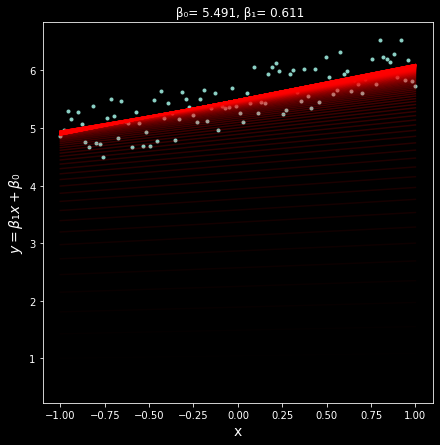

In [21]:
#Inicializamos optimizador, definimos 100 pasos para no llenar la memoria al dope
optimizer = GradientDescent(learning_rate=.05, max_iters=100, record_history=True) 
model = LinearRegression() #inicializamos nuestro objeto regresion 
model.fit(x_rl,y_rl, optimizer) #entrenamos el modelo

_ = plt.figure(figsize=(7,7))
_ = plt.plot(x_rl, y_rl, '.')

for t,w in enumerate(optimizer.w_history):
    _ = plt.plot(x_rl, x_rl*w[0]+w[1], 'r-', alpha=t/len(optimizer.w_history), label=str(t))
_ = plt.xlabel('x',fontsize=14)
_ = plt.ylabel('$y= β₁x+ β₀$', fontsize=14)
_ = plt.title(f" β₀= {model.betas[1]:.3f}, β₁= {model.betas[0]:.3f}")

nada mal. Veamos el modulo de los errores entre:

- la prediccion con el valor analítico de los parámetros de la regresión lineal, i.e. `predictions_exact`
- el valor predicho por el método del gradiente descendiente `predictions_gd`

In [22]:
predictions_exact = b0 + b1*x_rl
predictions_gd = model.predict(x_rl)

_ = plt.scatter(x_rl, np.abs(predictions_exact - predictions_sgd)) 
_ = plt.grid(linewidth=0.3)

NameError: name 'predictions_sgd' is not defined

# Convexidad

Que es la convexidad en términos matemáticos? Estamos acostumbrados a usar esta palabra generalemnte para espejos o lentes verdad? bueno, no es tanta casualidad.

Depende de qué objeto matemático estemos hablando, cabe una definición u otra, pero todas las interpretaciones de las mismas son intuitivas una vez que se tiene sedimentada la interpretación geométrica. Miremos los siguientes conjuntos.

<center>
   <img src="https://miro.medium.com/max/700/1*5q6hqLS11phsiIqgnif-BQ.png">
</center>

<br>

Antes de empezar a hablar de convexidad cabe aclarar qué es un conjunto! Un conjunto es el elemento central de **Set Theory** o **Teoría de Conjuntos** valga la redundancia. Es como se lo imaginan, un mengunje de elementos que comparten propiedades y/o cumplen ciertas restricciones. Por ejemplo una esfera de radio $1$ es un conjunto de puntos que cumplen con la propiedad de tener norma menor o igual a 1 

$$
\color{orange}{B_1 = \{x \ : \  \|x\|_2 \leq 1  \}}
$$


Un conjunto es convexo si al unir con una recta dos puntos del mismo, todos los puntos de la recta también estan contenidos en el mismo.

Si estamos hablando de funciones, la definición es similar. Una función es convexa si su epigrafica es un conjunto convexo. Qué es una epigráfica? etimología o una imagen dice mas que mil palabras. 

<center>
   <img src="https://miro.medium.com/max/700/1*s_cLMrwgbHFyM0bctXuloQ.png">
</center>

El que quiera jugar más con estas definiciones, tengan en cuenta otra manera de definir una función como convexa es el signo de la derivada segunda. Se dice que una función es convexa si 

$$
\color{orange}{ 0\leq f^{''}(x) }
$$

Caso contrario como se imaginaran, si una función tiene la derivada segunda menor a cero se trata de una función **cóncava**, jerga, nada más que jerga.

Pero por qué nos interesa? Bueno en particular el método del gradiente descendiente tiene garantizada la convergencia a la solución si y solo si la función de costo que estemos eligiendo sea convexa. En caso de no serlo, no tenemos manera de asegurar que el método iterativo llegará al **mínimo global**. Podemos llegar a estar en un lugar subóptimo, como ser un **mínimo local**


<center>
   <img src="https://miro.medium.com/max/375/1*tCmKnUQZ240vkEefxQyilQ.png">
</center>


## (Pequeño único y último paréntesis) 

La solución de problemas con conjuntos de decisión finitos es extremadamente relevante y de mucho interés, pero no es el mejor camino para entender la optimización desde el vamos. Las técnicas que se usan y la formulación varían, el mayor de los problemas reside en cómo evitar la fuerza bruta. Elaboro brevemente la línea de razonamiento. 

- un problema tiene un espacio de decisión finito
- como puedo enumerar todas esas posibles decisiones, puedo calcular la función de costo para cada una de ellas y elegir la mejor opción
- cuando el problema crece, veo que mi tiempo de ejecución para calcular todas las opciones crece de maneras absurda en términos de tiempo y memoria
- debo encontrar una manera imperfecta que evite calcular todas las combinaciones con **fuerza bruta**. 

Para más información un buen ejemplo de esto es el <a href="https://en.wikipedia.org/wiki/Travelling_salesman_problem"> TSP</a> (Travelling Salesman Problem) 

Técnicas usadas para resolver esta clase de problemas
- <a href="https://en.wikipedia.org/wiki/Ant_colony_optimization_algorithms">Ant Colony Optimization</a>
- <a href="https://en.wikipedia.org/wiki/Genetic_algorithm">Genetic Algorithms</a>
- <a href="https://en.wikipedia.org/wiki/Simulated_annealing"> Simulated Annealing </a>